# Klasifikasi Obesitas

## Setup the notebook

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
print("Setup Complete")

Setup Complete


Code diatas merupakan setup awalan sebelum melakukan analisis pada visualisasi data dengan menggunakan pustaka Phyton, yaitu pandas, matplotlib, seaborn dan numpy.

1. Import Library:

    1. `import pandas as pd`: Baris ini mengimpor library Pandas yang diberi nama panggilan `pd.` sehingga dapat digunakan dengan menambahkan `pd.` di awalan perintahnya.
    2. `pd.plotting.register_matplotlib_converters()`: Baris ini memastikan kompatibilitas antara Pandas dan Matplotlib.
    3. `import matplotlib.pyplot as plt`: Baris ini mengimpor library Matplotlib yang diberi nama panggilan `plt.` Matplotlib adalah library inti untuk membuat berbagai macam visualisasi data.
    4. `%matplotlib inline`: Baris khusus untuk notebook yang membuat hasil visualisasi Matplotlib ditampilkan langsung di dalam notebook, bukan di jendela terpisah.
    5. `import seaborn as sns`: Baris ini mengimpor library Seaborn yang diberi nama panggilan `sns.` sehingga dapat digunakan dengan menambahkan `sns.` di awalan perintahnya.
    6. `import numpy as np`: Baris ini mengimpor library NumPy yang diberi nama panggilan `np.` NumPy adalah library dasar untuk komputasi numerik dan aljabar linear di Python.

2. Pesan Konfirmasi:

    `print("Setup Complete")`: Baris ini mencetak pesan "Setup Complete" ke konsol, menginformasikan bahwa semua library yang diperlukan telah berhasil dimuat.
    
Secara keseluruhan, kode ini menyiapkan lingkungan untuk melakukan analisis data dengan Python. Library Pandas akan digunakan untuk menangani dan memanipulasi data, Matplotlib dan Seaborn untuk membuat visualisasi, dan NumPy untuk mendukung perhitungan numerik.

## Load the data

In [2]:
df = pd.read_csv('./Content/Obesity Classification.csv')
print(f"Kolom dataset: {df.columns.values}")

Kolom dataset: ['ID' 'Age' 'Gender' 'Height' 'Weight' 'BMI' 'Label']


Kode diatas digunakan untuk membaca data dari file CSV dan kemudian menampilkan nama kolom yang ada di dalamnya.

1. Membaca Data:

`df = pd.read_csv('./Content/Obesity Classification.csv')`: Baris ini menggunakan library Pandas (`pd`) untuk membaca data dari file CSV yang berlokasi di `'./Content/Obesity Classification.csv'` dan menyimpannya ke dalam dataframe yang diberi nama `df.`

2. Mencetak Nama Kolom:

`print(f"Kolom dataset: {df.columns.values}")`: Baris ini menggunakan fungsi `df.columns.values` untuk mendapatkan nama-nama kolom dari dataframe `df` dan kemudian menggunakan `f-string` untuk mencetaknya dengan label `"Kolom dataset: "`.

`df.columns`: Aksesor ini mengembalikan Index yang berisi label (nama) dari kolom-kolom dalam dataframe.

`.values`: Konversi Index menjadi NumPy array yang berisi nama-nama kolom.

`f-string`: String literal yang diawali dengan f memungkinkan kita untuk memasukkan ekspresi Python di dalam kurung kurawal {}.


## Data Cleaning

### Menampilkan 5 data teratas dari data

In [3]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


Kode `df.head()` digunakan untuk menampilkan lima baris pertama yang terdapat pada file csv yang telah di eksekusi di awal yaitu `df = pd.read_csv('./Content/Obesity Classification.csv')`

### Menghapus kolom ID

In [4]:
df.drop(labels='ID',axis=1,inplace=True) # Menghapus fitur yg tidak penting pada df
df

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight


Kode diatas adalah kode yang digunakan untuk menghapus kolom "ID" dari dataframe df dan kemudian menampilkan dataframe yang telah diubah.

1. `df.drop(labels='ID',axis=1,inplace=True)`: Baris ini menggunakan fungsi drop pada dataframe `df` untuk menghapus kolom dengan nama `"ID"`.

    `labels='ID'`: Menentukan kolom yang ingin dihapus berdasarkan namanya, yaitu `"ID"`.
    
    `axis=1`: Menentukan bahwa kolom yang ingin dihapus adalah kolom (`axis=0` untuk baris).    
    
    `inplace=True`: Menentukan bahwa perubahan diterapkan pada dataframe `df` secara langsung (tanpa membuat dataframe baru).

2. `df`: Baris ini menampilkan dataframe `df` setelah kolom `"ID"` dihapus.

### Mengecek tipe data

In [4]:
df.dtypes

ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

Kode `df.dtypes` diatas digunakan untuk menampilkan tipe tipe data untuk semua kolom pada dataset yang tersimpan dalam `df`.

### Mencari data kosong

In [9]:
df.isnull().sum() # Mencari data kosong

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

Kode `df.isnull().sum()` diatas digunakan untuk mencari data yang kosong (missing values) dalam dataframe `df.`

### Mencari NaN

In [10]:
df.isna().sum() # Mencari NaN

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

Kode `df.isna().sum()` diatas digunakan untuk mencari nilai NaN (Not a Number) yang hilang dalam dataframe df.

### Menampilkan statistik deskriptif dari data

In [11]:
df.describe()

,ID,Age,Gender,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,0.518519,166.574074,59.490741,20.549074
std,31.917939,24.720620,0.501986,27.873615,28.856233,7.583818
min,1.000000,11.000000,0.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,0.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,1.000000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,1.000000,190.000000,85.000000,26.100000
max,110.000000,112.000000,1.000000,210.000000,120.000000,37.200000


Kode `df.describe()` digunakan untuk menghitung statistik deskriptif dari kolom numerik dalam dataframe `df.`

Statistik yang dihitung meliputi:

1. `Count`: Jumlah data yang tidak kosong (non-missing values) dalam kolom.
2. `Mean`: Rata-rata nilai dalam kolom.
3. `Std`: Standar deviasi dari nilai-nilai dalam kolom (ukuran bagaimana data tersebar dari mean).
4. `Min`: Nilai minimum dalam kolom.
5. `25% (Q1)`: Kuartilan pertama, yaitu nilai yang membagi data menjadi 25% bagian bawah dan 6.75% bagian atas.
5. `50% (Median)`: Median atau nilai tengah dari data yang sudah diurutkan.
6. `75% (Q3)`: Kuartilan ketiga, yaitu nilai yang membagi data menjadi 75% bagian bawah dan 25% bagian atas.
7. `Max`: Nilai maksimum dalam kolom.

### Cek baris dan kolom

In [12]:
df.shape

(108, 7)

Kode `df.shape` diatas digunakan untuk menghitung banyak nya baris dan kolom yang terdapat pada dataset.

### Cek banyak label

In [13]:
print(f"Label: {df['Label'].unique()}") # Melihat banyak label atau kelas

Label: ['Normal Weight' 'Overweight' 'Underweight' 'Obese']


Kode `print(f"Label: {df['Label'].unique()}")` digunakan untuk melihat label atau kelas yang berbeda dalam dataset `df.`


## Data Visualize

### Klasifikasi Jumlah Data

C:\Users\MyBook14H\AppData\Local\Temp\ipykernel_1524\517848392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df , x = 'Label' , palette='Set1')


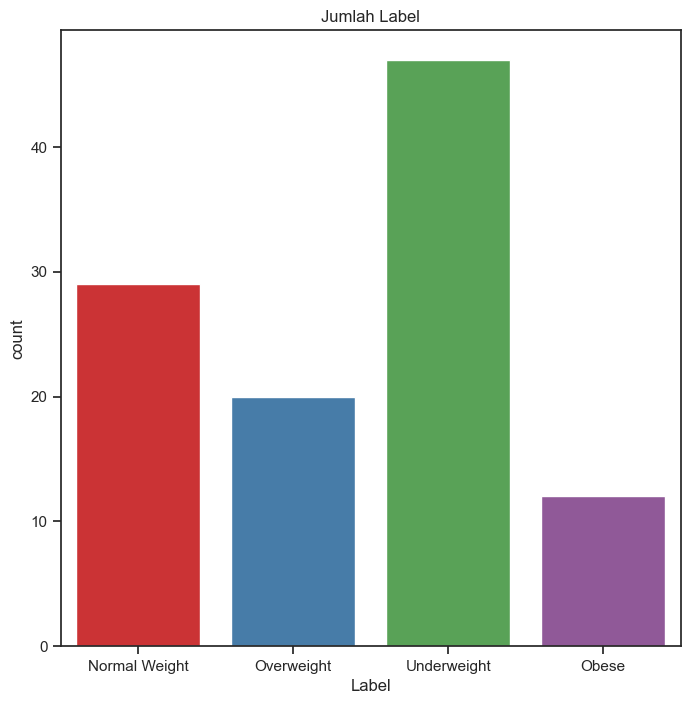

In [12]:
# Jumlah data pada klasifikasi obesitas
plt.figure(figsize=(8,8))
sns.countplot(data=df , x = 'Label' , palette='Set1')
plt.title('Jumlah Label')
plt.show()

Kode ini digunakan untuk memvisualisasi jumlah data pada klasifikasi obesitas. 

1. `plt.figure(figsize=(8,8))`:
    Mengatur ukuran gambar plot menjadi 8x8 inci.

2. `sns.countplot(data=df , x = 'Label' , palette='Set1')`:
    Memanggil fungsi countplot dari library seaborn untuk membuat plot.
    `data=df`: Menentukan dataframe `df` sebagai sumber data.
    `x = 'Label'`: Menentukan kolom Label sebagai variabel yang diplot pada sumbu x.
    `palette='Set1'`: Memilih palet warna Set1 untuk mewarnai bar pada plot.

3. `plt.title('Jumlah Label')`:
Menambahkan judul untuk plot, yaitu "Jumlah Label".

4. `plt.show()`:
Menampilkan plot di layar.

Sehingga plot ini menampilkan label label yang diwakili oleh bar yaitu label Normal Weight, Overweight, Underweight dan Obese

### Visualisasi Distribusi Umur Berdasarkan Label dengan KDE Plot

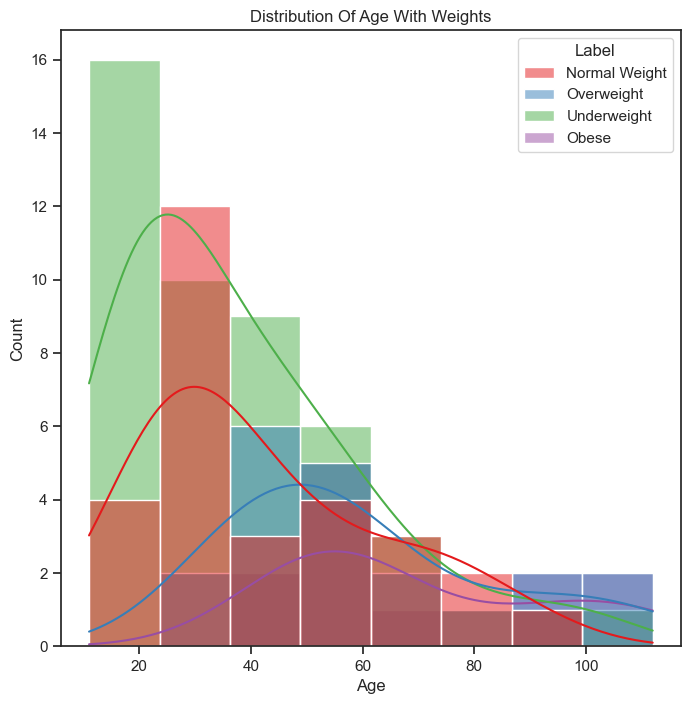

In [11]:
plt.figure(figsize=(8,8))
sns.histplot(data=df , x = 'Age' , hue = 'Label' , kde=True ,palette='Set1' )
plt.title('Distribution Of Age With Weights');
plt.show()

Kode yang diberikan menghasilkan visualisasi distribusi umur berdasarkan label (Normal weight, Overwight, Underweight dan Obese) dalam dataset df. Berikut penjelasannya:

1. `plt.figure(figsize=(8,8))`:
Mengatur ukuran gambar plot menjadi 8x8 inci.

2. `sns.histplot(data=df , x = 'Age' , hue = 'Label' , kde=True ,palette='Set1')`:
Memanggil fungsi histplot dari library seaborn untuk membuat plot distribusi.

    `data=df`: Menentukan dataframe df sebagai sumber data.
    
    `x = 'Age'`: Menentukan kolom Age sebagai variabel yang diplot pada sumbu x (distribusi umur).
    
    `hue = 'Label'`: Menambahkan warna berdasarkan label (Normal weight, Overwight, Underweight dan Obese).
    
    `kde=True`: Menambahkan kurva perkiraan kepadatan inti (Kernel Density Estimation - KDE) untuk setiap label.
    
    `palette='Set1'`: Memilih palet warna Set1 untuk mewarnai elemen plot.

3. `plt.title('Distribution Of Age With Weights');`:
Menambahkan judul untuk plot, yaitu "Distribution Of Age With Weights" (Distribusi Umur dengan Bobot).

4. `plt.show()`:
Menampilkan plot di layar.

Output:

Plot ini akan menampilkan:

1. Histogram distribusi umur untuk label (Normal weight, Overwight, Underweight dan Obese) dalam warna berbeda.
2. Kurva KDE untuk setiap label, yang menunjukkan perkiraan kepadatan probabilitas distribusi umur.

Manfaat:

1. Memvisualisasi distribusi umur untuk setiap label "Sehat" dan "Obesitas".
2. Membandingkan distribusi umur antar label.
3. Membantu dalam memahami pola dan potensi perbedaan umur antar kategori.

### Visualisasi menggunakan Box Plot

C:\Users\MyBook14H\AppData\Local\Temp\ipykernel_1524\3791794243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Label',y='BMI',palette='Set1')


Text(0.5, 1.0, 'BMI For Each Weights')

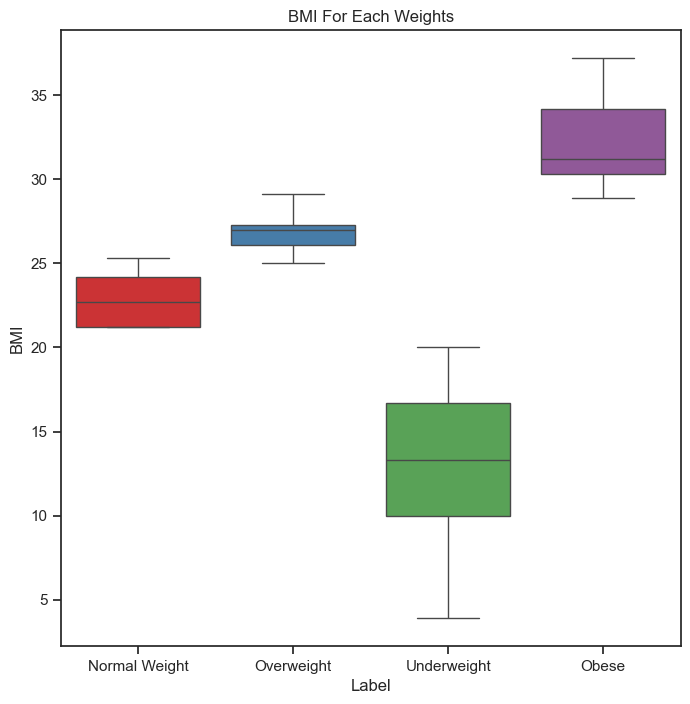

In [13]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df,x='Label',y='BMI',palette='Set1')
plt.title('BMI For Each Weights')

Kode tersebut menggunakan library `seaborn` untuk membuat visualisasi distribusi Body Mass Index (BMI) berdasarkan label (Normal weight, Overwight, Underweight dan Obese) dalam dataset `df`.

1. `plt.figure(figsize=(8,8))`:
    Ini adalah fungsi dari library `matplotlib` untuk mengatur ukuran area plot menjadi lebar 8 inci dan tinggi 8 inci.

2. `sns.boxplot(data=df,x='Label',y='BMI',palette='Set1')`:
    Bagian ini menggunakan fungsi boxplot dari library seaborn untuk membuat box plot.
    `data=df`: Menentukan dataframe df sebagai sumber data untuk plot.
    `x='Label'`: Menentukan sumbu x sebagai label (Normal weight, Overwight, Underweight dan Obese). Ini akan mengelompokkan data BMI berdasarkan label.
    `y='BMI'`: Menentukan sumbu y sebagai BMI. Nilai BMI akan diplotkan untuk setiap label.
    `palette='Set1'`: Memilih palet warna Set1 untuk mewarnai box plot berdasarkan label.

3. `plt.title('BMI For Each Weights')`:
    Menambahkan judul untuk plot, yaitu "BMI For Each Weights" (meskipun seharusnya "BMI for Each Label" karena sumbu x berdasarkan label).

4. `plt.show()`: (biasanya ditambahkan setelah plt.title)
    Meskipun tidak dituliskan eksplisit, fungsi plt.show() biasanya ditambahkan setelah pemberian judul untuk menampilkan plot yang dibuat di layar.



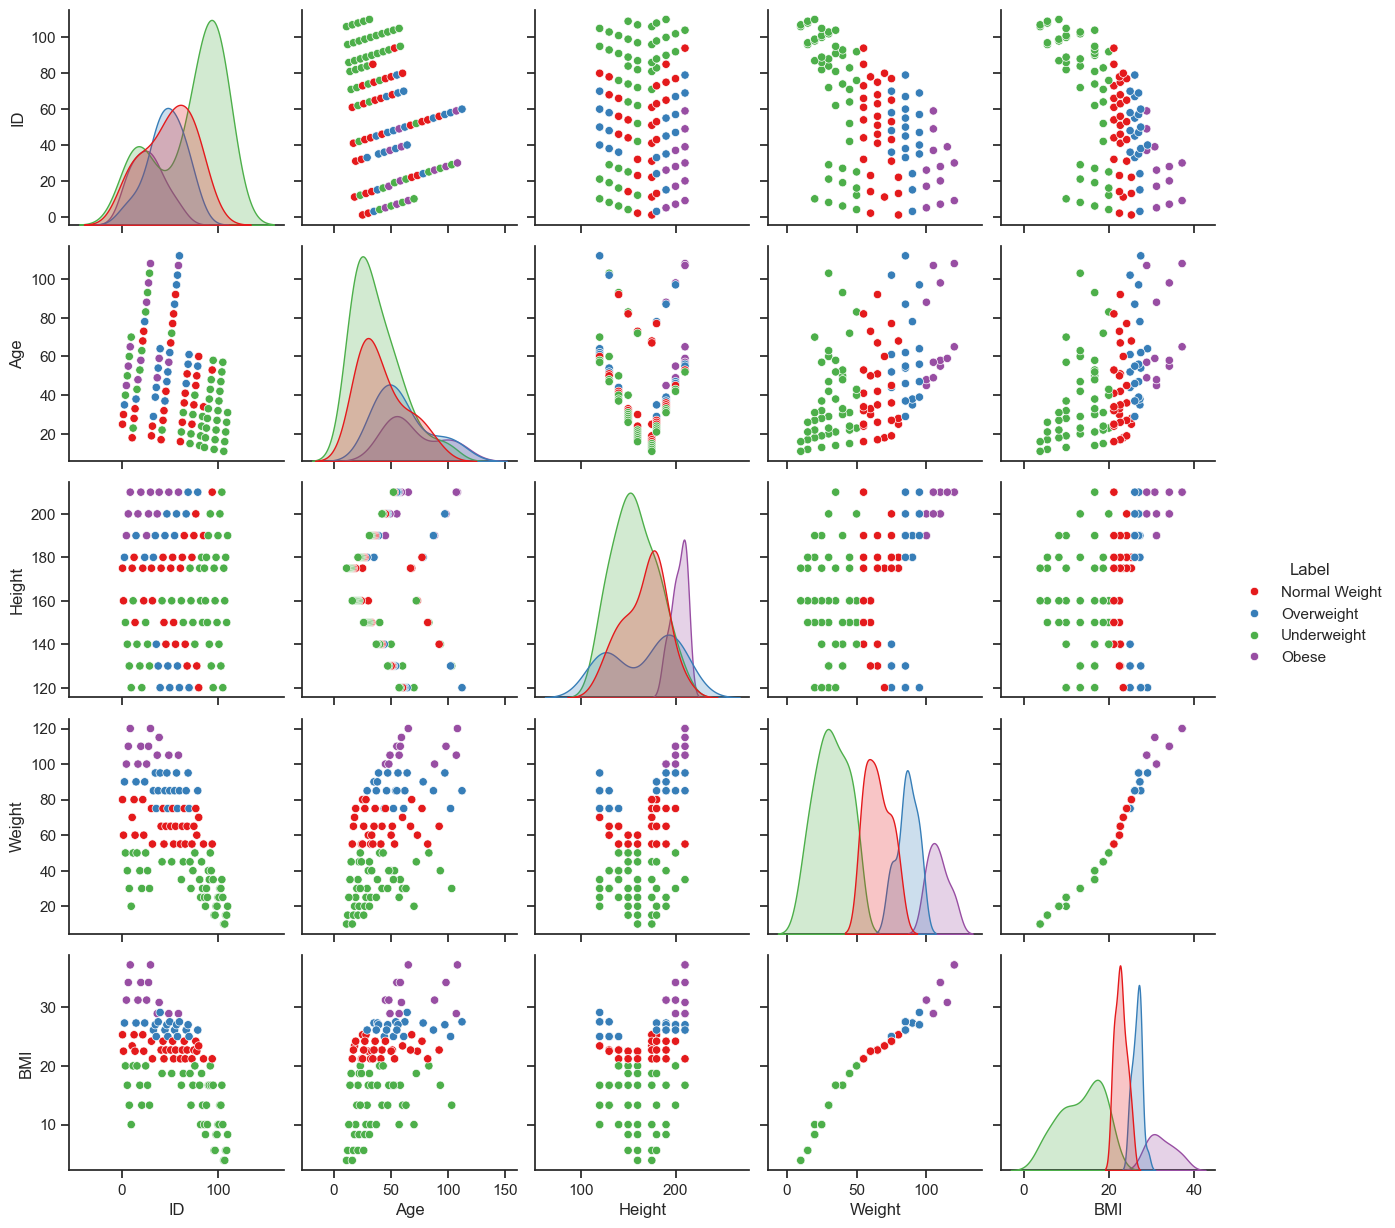

In [5]:
# Gunakan seaborn untuk membuat plot seabarplot
sns.set(style="ticks")
sns.pairplot(df, hue='Label', palette='Set1')
plt.show()